<a href="https://colab.research.google.com/github/AnastasiaTitova31/Analysis-of-user-behavior-in-a-mobile-application/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Импорт необходимых библиотек
import pandas as pd

In [ ]:
# Напишите функцию которая скачивает данные с гитхаба
# Функция принимает на вход дату
# Функция должна вернуть список словарей или датафрейм, можно(лучше) использовать можно использоват pandas.read_csv()

# С помощью этой функции вы считаете данные по 2 ссылкам
# ссылка на гитхаб с курсами валют - https://github.com/datanlnja/airflow_course/tree/main/excangerate
# ссылка на гитхаб с данными о продажах - https://github.com/datanlnja/airflow_course/tree/main/data

def extract_data(url, date):
  data=pd.read_csv("{}/{}.csv".format(url,date))
  #currency=pd.read_csv("{}data/{}.csv".format(url,date))
  return data

#### Если вы никогда не работали в GitHub -> чтобы получить ссылку на файл вам необходимо открыть файл и нажать справа сверху кнопку raw. После чего появится ссылка, её можно использовать как маску для остальных файлов.

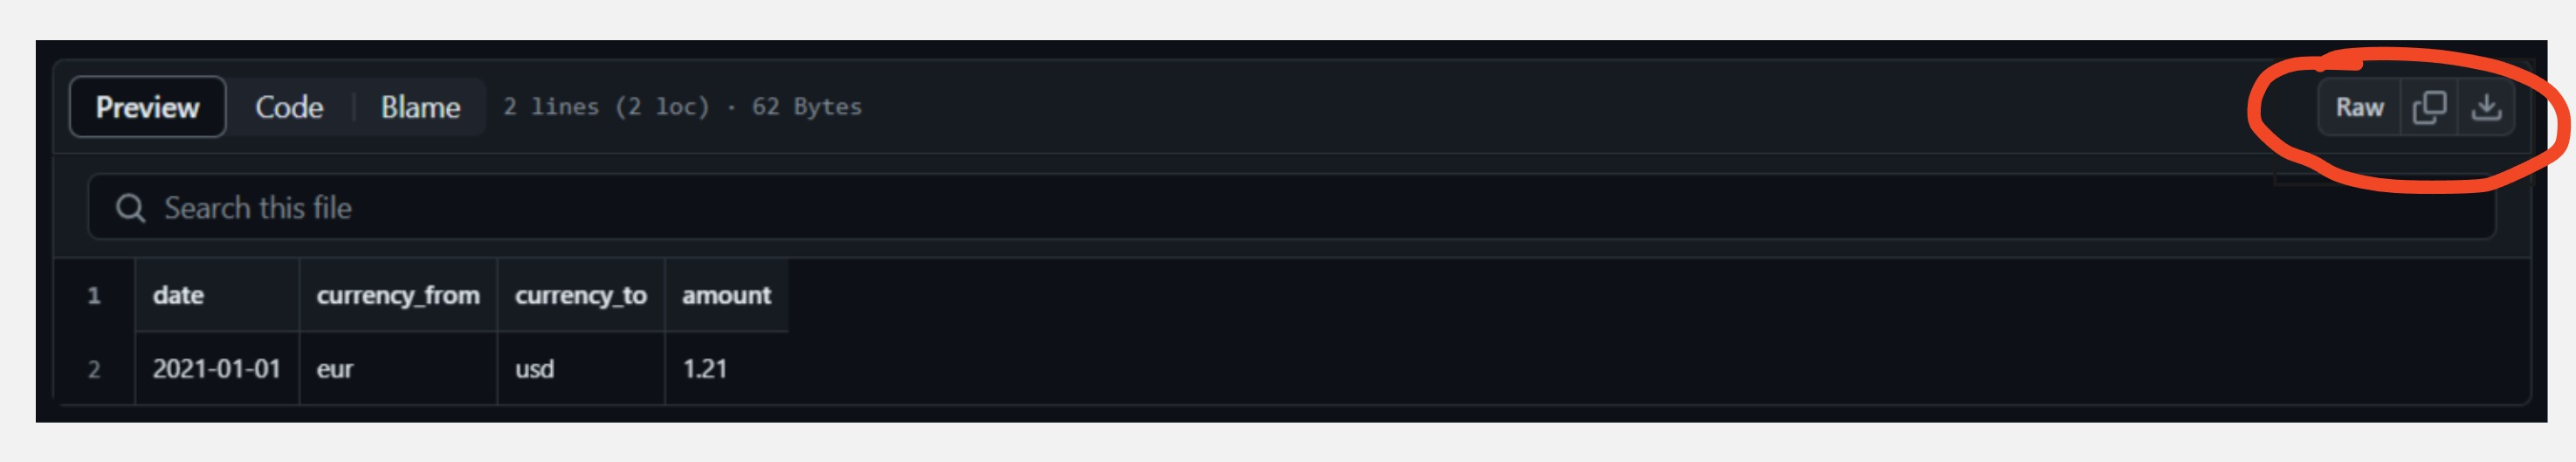

In [ ]:
# Напишите функцию которая вставляет данные в файл (не перезаписывает.. а добавляет новые!)
def insert_to_file(udate):
  udate.to_csv(r"C:\Users\atitova\Desktop\data.csv", mode='a', header=False)

In [ ]:
# Напишите функцию которая обюъединит данные по ключу или паре ключей
# На выходе возвращает данные, рекомендую использовать pandas.DataFrame

def merge_data(data1, data2, key):
  return pd.merge(data1,data2, on=key)

In [ ]:
# Запустите ваш код в функции main

# Напишите генерацию дат, так чтобы у вас получился список
# 2021-01-02, 2021-01-03 ... etc
# Нужны даты с 2021-01-01 по 2021-01-04

dates_list = list(pd.date_range(start="2021-01-01",end="2021-01-04").strftime('%Y-%m-%d'))

def main(date):

  # Выгружаем данные по валютам и из источника
  currency = extract_data('https://raw.githubusercontent.com/datanlnja/airflow_course/main/excangerate', date)
  data = extract_data('https://raw.githubusercontent.com/datanlnja/airflow_course/main/data', date)

  # Объедините данные в 1 таблицу
  mg_data = merge_data(currency,data, 'date')

  # Вставляем данные в файл
  insert_to_file(mg_data)


# Пройдемся по списку дат и выполним скрипт
for date in dates_list:
  main(date)

In [ ]:
for date in dates_list:
  currency = extract_data('https://raw.githubusercontent.com/datanlnja/airflow_course/main/excangerate', date)
  data = extract_data('https://raw.githubusercontent.com/datanlnja/airflow_course/main/data', date)

  new=merge_data(currency,data, 'date')
  new['sum']=new['amount']*new['value']
  new.to_excel(r"C:\Users\atitova\Desktop\data.xlsx")